In [1]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
dpc = pd.read_json("data/DPC.json").transpose()

In [3]:
dpc.drop(["all_word_counts", "barracks_status_dire", "barracks_status_radiant", "chat", "cluster", "comeback", 
          "cosmetics", "dire_score", "series_type", "skill", "stomp", "teamfights", "throw", "tower_status_dire", 
          "tower_status_radiant", "loss", "leagueid", "duration", "engine", "first_blood_time", "radiant_xp_adv", 
          "replay_url", "radiant_gold_adv", "positive_votes", "radiant_score", "negative_votes", 
          "objectives", "dire_team_id", "radiant_team_id", "human_players", "league", "lobby_type", 
          "draft_timings", "my_word_counts", "region", "replay_salt", "series_id"], axis=1, inplace=True)
dpc.drop([1], inplace=True)

In [4]:
# function that takes in range of patch number
# and returns dataframe with 1 team's picks and bans,
# and if the team won the match
def create_pick_ban_1_team(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["pick_1", "pick_2", "pick_3", "pick_4", "pick_5",
                                 "ban_1", "ban_2", "ban_3", "ban_4", "ban_5", "ban_6",
                                 "win"])
    for i in dpc.index:
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                ban1 = dpc.at[i, 'picks_bans'][0]["hero_id"]
                ban6 = dpc.at[i, 'picks_bans'][1]["hero_id"]
                ban2 = dpc.at[i, 'picks_bans'][2]["hero_id"]
                ban7 = dpc.at[i, 'picks_bans'][3]["hero_id"]
                ban3 = dpc.at[i, 'picks_bans'][4]["hero_id"]
                ban8 = dpc.at[i, 'picks_bans'][5]["hero_id"]

                pick1 = dpc.at[i, 'picks_bans'][6]["hero_id"]
                pick6 = dpc.at[i, 'picks_bans'][7]["hero_id"]
                pick7 = dpc.at[i, 'picks_bans'][8]["hero_id"]
                pick2 = dpc.at[i, 'picks_bans'][9]["hero_id"]

                ban9 = dpc.at[i, 'picks_bans'][10]["hero_id"]
                ban4 = dpc.at[i, 'picks_bans'][11]["hero_id"]
                ban10 = dpc.at[i, 'picks_bans'][12]["hero_id"]
                ban5 = dpc.at[i, 'picks_bans'][13]["hero_id"]

                pick8 = dpc.at[i, 'picks_bans'][14]["hero_id"]
                pick3 = dpc.at[i, 'picks_bans'][15]["hero_id"]
                pick9 = dpc.at[i, 'picks_bans'][16]["hero_id"]
                pick4 = dpc.at[i, 'picks_bans'][17]["hero_id"]  

                ban11 = dpc.at[i, 'picks_bans'][18]["hero_id"]
                ban6 = dpc.at[i, 'picks_bans'][19]["hero_id"]

                pick5 = dpc.at[i, 'picks_bans'][20]["hero_id"]
                pick10 = dpc.at[i, 'picks_bans'][21]["hero_id"] 

                firstWin = True
                secondWin = False

                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            firstWin = dpc.at[i, 'radiant_win']
                            secondWin = not dpc.at[i, 'radiant_win']

                if not player1_first_pick:
                    # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                    secondWin = dpc.at[i, 'radiant_win']
                    firstWin = not dpc.at[i, 'radiant_win']

                dpc_df = dpc_df.append({"pick_1": pick1, 
                                         "pick_2": pick2, 
                                         "pick_3": pick3, 
                                         "pick_4": pick4, 
                                         "pick_5": pick5,
                                         "ban_1": ban1, 
                                         "ban_2": ban2, 
                                         "ban_3": ban3, 
                                         "ban_4": ban4, 
                                         "ban_5": ban5,
                                         "ban_6": ban6,
                                         "win": firstWin}, ignore_index=True)
                dpc_df = dpc_df.append({"pick_1": pick6, 
                                         "pick_2": pick7, 
                                         "pick_3": pick8, 
                                         "pick_4": pick9, 
                                         "pick_5": pick10,
                                         "ban_1": ban6, 
                                         "ban_2": ban7, 
                                         "ban_3": ban8, 
                                         "ban_4": ban9, 
                                         "ban_5": ban10,
                                         "ban_6": ban11,
                                         "win": secondWin}, ignore_index=True)
    return dpc_df

In [5]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# has data for pick, ban, and win
patch707_single = create_pick_ban_1_team(26, 28)
patch710_single = create_pick_ban_1_team(29, 32)
patch714_single = create_pick_ban_1_team(33, 36)
patchAll_single = create_pick_ban_1_team(26, 36)

In [6]:
patch714_single.shape

(748, 12)

In [7]:
patchAll_single.shape

(1998, 12)

In [8]:
patch710_single.shape

(512, 12)

In [9]:
patch707_single.shape

(738, 12)

In [10]:
# function that takes in range of patch number
# and returns dataframe with radiant picks, dire picks, radiant/dire team ids,
# and if radiant won the match
def create_pick_ban_both_teams(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["r_pick_1", "r_pick_2", "r_pick_3", "r_pick_4", "r_pick_5",
                                     "r_ban_1", "r_ban_2", "r_ban_3", "r_ban_4", "r_ban_5", "r_ban_6",
                                     "d_pick_1", "d_pick_2", "d_pick_3", "d_pick_4", "d_pick_5",
                                     "d_ban_1", "d_ban_2", "d_ban_3", "d_ban_4", "d_ban_5", "d_ban_6",
                                     "radiantWin", "radiant", "dire"])
    for i in dpc.index: 
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                ban1 = dpc.at[i, "picks_bans"][0]["hero_id"]
                ban6 = dpc.at[i, "picks_bans"][1]["hero_id"]
                ban2 = dpc.at[i, "picks_bans"][2]["hero_id"]
                ban7 = dpc.at[i, "picks_bans"][3]["hero_id"]
                ban3 = dpc.at[i, "picks_bans"][4]["hero_id"]
                ban8 = dpc.at[i, "picks_bans"][5]["hero_id"]

                pick1 = dpc.at[i, "picks_bans"][6]["hero_id"]
                pick6 = dpc.at[i, "picks_bans"][7]["hero_id"]
                pick7 = dpc.at[i, "picks_bans"][8]["hero_id"]
                pick2 = dpc.at[i, "picks_bans"][9]["hero_id"]

                ban9 = dpc.at[i, "picks_bans"][10]["hero_id"]
                ban4 = dpc.at[i, "picks_bans"][11]["hero_id"]
                ban10 = dpc.at[i, "picks_bans"][12]["hero_id"]
                ban5 = dpc.at[i, "picks_bans"][13]["hero_id"]

                pick8 = dpc.at[i, "picks_bans"][14]["hero_id"]
                pick3 = dpc.at[i, "picks_bans"][15]["hero_id"]
                pick9 = dpc.at[i, "picks_bans"][16]["hero_id"]
                pick4 = dpc.at[i, "picks_bans"][17]["hero_id"]  

                ban11 = dpc.at[i, "picks_bans"][18]["hero_id"]
                ban6 = dpc.at[i, "picks_bans"][19]["hero_id"]

                pick5 = dpc.at[i, "picks_bans"][20]["hero_id"]
                pick10 = dpc.at[i, "picks_bans"][21]["hero_id"] 

                radiantWin = dpc.at[i, "radiant_win"]
                
                try:
                    team1_id = dpc.at[i, "radiant_team"]["team_id"]
                    team2_id = dpc.at[i, "dire_team"]["team_id"]
                except TypeError:
                    continue
                    
                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]
                picks_bans = {}

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            # print(str(dpc.at[i, "players"][0]["name"]) + " has 1st pick and is radiant")
                            picks_bans = {"r_pick_1": pick1, "r_pick_2": pick2, "r_pick_3": pick3, 
                                            "r_pick_4": pick4, "r_pick_5": pick5,
                                            "r_ban_1": ban1, "r_ban_2": ban2, "r_ban_3": ban3, 
                                            "r_ban_4": ban4, "r_ban_5": ban5, "r_ban_6": ban6,
                                            "d_pick_1": pick6, "d_pick_2": pick7, "d_pick_3": pick8, 
                                            "d_pick_4": pick9, "d_pick_5": pick10,
                                            "d_ban_1": ban6, "d_ban_2": ban7, "d_ban_3": ban8, 
                                            "d_ban_4": ban9, "d_ban_5": ban10, "d_ban_6": ban11}

                if not player1_first_pick:
                        # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                        picks_bans = {"r_pick_1": pick6, "r_pick_2": pick7, "r_pick_3": pick8, 
                                        "r_pick_4": pick9, "r_pick_5": pick10,
                                        "r_ban_1": ban6, "r_ban_2": ban7, "r_ban_3": ban8, 
                                        "r_ban_4": ban9, "r_ban_5": ban10, "r_ban_6": ban11,
                                        "d_pick_1": pick1, "d_pick_2": pick2, "d_pick_3": pick3, 
                                        "d_pick_4": pick4, "d_pick_5": pick5,
                                        "d_ban_1": ban1, "d_ban_2": ban2, "d_ban_3": ban3, 
                                        "d_ban_4": ban4, "d_ban_5": ban5, "d_ban_6": ban6}        

                picks_bans.update({"radiantWin": radiantWin,
                                 "radiant": team1_id,
                                 "dire": team2_id})

                row = pd.Series(picks_bans)

                dpc_df = dpc_df.append(row, ignore_index=True)
    return dpc_df

In [11]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# has radiant picks/bans, dire picks/bans, team_ids, radiant win(true/false)
patch707_combined = create_pick_ban_both_teams(26, 28)
patch710_combined = create_pick_ban_both_teams(29, 32)
patch714_combined = create_pick_ban_both_teams(33, 36)
patchAll_combined = create_pick_ban_both_teams(26, 36)

In [12]:
def create_picks_team(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["pick_1", "pick_2", "pick_3", "pick_4", "pick_5",
                                 "win", "team"])
    for i in dpc.index: 
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                pick1 = dpc.at[i, "picks_bans"][6]["hero_id"]
                pick6 = dpc.at[i, "picks_bans"][7]["hero_id"]
                pick7 = dpc.at[i, "picks_bans"][8]["hero_id"]
                pick2 = dpc.at[i, "picks_bans"][9]["hero_id"]

                pick8 = dpc.at[i, "picks_bans"][14]["hero_id"]
                pick3 = dpc.at[i, "picks_bans"][15]["hero_id"]
                pick9 = dpc.at[i, "picks_bans"][16]["hero_id"]
                pick4 = dpc.at[i, "picks_bans"][17]["hero_id"]  

                pick5 = dpc.at[i, "picks_bans"][20]["hero_id"]
                pick10 = dpc.at[i, "picks_bans"][21]["hero_id"] 

                firstWin = True
                secondWin = False
                try:
                    team1_id = dpc.at[i, "radiant_team"]["team_id"]
                except TypeError:
                    continue
                team2_id = dpc.at[i, "dire_team"]["team_id"]
                
                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            firstWin = dpc.at[i, 'radiant_win']
                            secondWin = not dpc.at[i, 'radiant_win']

                if not player1_first_pick:
                    # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                    secondWin = dpc.at[i, 'radiant_win']
                    firstWin = not dpc.at[i, 'radiant_win']
                    team1_id = dpc.at[i, "dire_team"]["team_id"]
                    team2_id = dpc.at[i, "radiant_team"]["team_id"]

                dpc_df = dpc_df.append({"pick_1": pick1, 
                                         "pick_2": pick2, 
                                         "pick_3": pick3, 
                                         "pick_4": pick4, 
                                         "pick_5": pick5,
                                         "win": firstWin,
                                         "team": team1_id}, ignore_index=True)
                dpc_df = dpc_df.append({"pick_1": pick6, 
                                         "pick_2": pick7, 
                                         "pick_3": pick8, 
                                         "pick_4": pick9, 
                                         "pick_5": pick10,
                                         "win": secondWin,
                                         "team": team2_id}, ignore_index=True)
    return dpc_df

In [13]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# these are data with picks, team_id, and win (true, false)
patch707_picks_team = create_picks_team(26, 28)
patch710_picks_team = create_picks_team(29, 32)
patch714_picks_team = create_picks_team(33, 36)
patchAll_picks_team = create_picks_team(26, 36)

In [14]:
def create_picks(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["pick_1", "pick_2", "pick_3", "pick_4", "pick_5",
                                 "win"])
    for i in dpc.index: 
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                pick1 = dpc.at[i, "picks_bans"][6]["hero_id"]
                pick6 = dpc.at[i, "picks_bans"][7]["hero_id"]
                pick7 = dpc.at[i, "picks_bans"][8]["hero_id"]
                pick2 = dpc.at[i, "picks_bans"][9]["hero_id"]

                pick8 = dpc.at[i, "picks_bans"][14]["hero_id"]
                pick3 = dpc.at[i, "picks_bans"][15]["hero_id"]
                pick9 = dpc.at[i, "picks_bans"][16]["hero_id"]
                pick4 = dpc.at[i, "picks_bans"][17]["hero_id"]  

                pick5 = dpc.at[i, "picks_bans"][20]["hero_id"]
                pick10 = dpc.at[i, "picks_bans"][21]["hero_id"] 

                firstWin = True
                secondWin = False

                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]

                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            firstWin = dpc.at[i, 'radiant_win']
                            secondWin = not dpc.at[i, 'radiant_win']

                if not player1_first_pick:
                    # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                    secondWin = dpc.at[i, 'radiant_win']
                    firstWin = not dpc.at[i, 'radiant_win']

                dpc_df = dpc_df.append({"pick_1": pick1, 
                                         "pick_2": pick2, 
                                         "pick_3": pick3, 
                                         "pick_4": pick4, 
                                         "pick_5": pick5,
                                         "win": firstWin}, ignore_index=True)
                dpc_df = dpc_df.append({"pick_1": pick6, 
                                         "pick_2": pick7, 
                                         "pick_3": pick8, 
                                         "pick_4": pick9, 
                                         "pick_5": pick10,
                                         "win": secondWin}, ignore_index=True)
    return dpc_df

In [15]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# these are data with only picks and win (true,false)
patch707_picks = create_picks(26, 28)
patch710_picks = create_picks(29, 32)
patch714_picks = create_picks(33, 36)
patchAll_picks = create_picks(26, 36)

In [16]:
# function that takes in range of patch number
# and returns dataframe with 1 team's picks and bans,
# if the team won the match, and team_id
def create_pick_ban_team(patch_range_low, patch_range_high):
    dpc_df = pd.DataFrame(columns=["pick_1", "pick_2", "pick_3", "pick_4", "pick_5",
                                 "ban_1", "ban_2", "ban_3", "ban_4", "ban_5", "ban_6",
                                 "win", "team"])
    for i in dpc.index:
        patch = dpc.at[i, 'patch']
        game_mode = dpc.at[i, 'game_mode']
        if patch >= patch_range_low and patch <= patch_range_high and game_mode == 2: 
            length = len(dpc.at[i, 'picks_bans'])
            if  length == 22:
                ban1 = dpc.at[i, 'picks_bans'][0]["hero_id"]
                ban6 = dpc.at[i, 'picks_bans'][1]["hero_id"]
                ban2 = dpc.at[i, 'picks_bans'][2]["hero_id"]
                ban7 = dpc.at[i, 'picks_bans'][3]["hero_id"]
                ban3 = dpc.at[i, 'picks_bans'][4]["hero_id"]
                ban8 = dpc.at[i, 'picks_bans'][5]["hero_id"]

                pick1 = dpc.at[i, 'picks_bans'][6]["hero_id"]
                pick6 = dpc.at[i, 'picks_bans'][7]["hero_id"]
                pick7 = dpc.at[i, 'picks_bans'][8]["hero_id"]
                pick2 = dpc.at[i, 'picks_bans'][9]["hero_id"]

                ban9 = dpc.at[i, 'picks_bans'][10]["hero_id"]
                ban4 = dpc.at[i, 'picks_bans'][11]["hero_id"]
                ban10 = dpc.at[i, 'picks_bans'][12]["hero_id"]
                ban5 = dpc.at[i, 'picks_bans'][13]["hero_id"]

                pick8 = dpc.at[i, 'picks_bans'][14]["hero_id"]
                pick3 = dpc.at[i, 'picks_bans'][15]["hero_id"]
                pick9 = dpc.at[i, 'picks_bans'][16]["hero_id"]
                pick4 = dpc.at[i, 'picks_bans'][17]["hero_id"]  

                ban11 = dpc.at[i, 'picks_bans'][18]["hero_id"]
                ban6 = dpc.at[i, 'picks_bans'][19]["hero_id"]

                pick5 = dpc.at[i, 'picks_bans'][20]["hero_id"]
                pick10 = dpc.at[i, 'picks_bans'][21]["hero_id"] 

                firstWin = True
                secondWin = False

                team1 = pd.Series({"pick_1": pick1, "pick_2": pick2, "pick_3": pick3, "pick_4": pick4, "pick_5": pick5})
                player1_hero = dpc.at[i, "players"][0]["hero_id"]
                player1_first_pick = False
                player1_radiant = dpc.at[i, "players"][0]["isRadiant"]

                try:
                    team1_id = dpc.at[i, "radiant_team"]["team_id"]
                except TypeError:
                    continue
                team2_id = dpc.at[i, "dire_team"]["team_id"]
                
                for hero in team1:
                    if hero == player1_hero:
                        player1_first_pick = True
                        # this is ran when player1's team has first pick and is radiant
                        if player1_radiant:
                            firstWin = dpc.at[i, 'radiant_win']
                            secondWin = not dpc.at[i, 'radiant_win']

                if not player1_first_pick:
                    # print(str(dpc.at[i, "players"][0]["name"]) + " has 2nd pick and is radiant")
                    secondWin = dpc.at[i, 'radiant_win']
                    firstWin = not dpc.at[i, 'radiant_win']
                    team1_id = dpc.at[i, "dire_team"]["team_id"]
                    team2_id = dpc.at[i, "radiant_team"]["team_id"]
                    
                dpc_df = dpc_df.append({"pick_1": pick1, 
                                         "pick_2": pick2, 
                                         "pick_3": pick3, 
                                         "pick_4": pick4, 
                                         "pick_5": pick5,
                                         "ban_1": ban1, 
                                         "ban_2": ban2, 
                                         "ban_3": ban3, 
                                         "ban_4": ban4, 
                                         "ban_5": ban5,
                                         "ban_6": ban6,
                                         "win": firstWin,
                                         "team": team1_id}, ignore_index=True)
                dpc_df = dpc_df.append({"pick_1": pick6, 
                                         "pick_2": pick7, 
                                         "pick_3": pick8, 
                                         "pick_4": pick9, 
                                         "pick_5": pick10,
                                         "ban_1": ban6, 
                                         "ban_2": ban7, 
                                         "ban_3": ban8, 
                                         "ban_4": ban9, 
                                         "ban_5": ban10,
                                         "ban_6": ban11,
                                         "win": secondWin,
                                         "team": team2_id}, ignore_index=True)
    return dpc_df

In [17]:
# major patches
# patch 7.07 to 7.09 (patch 26 to 28)
# patch 7.10 to 7.13 (patch 29 to 32)
# patch 7.14 to 7.16 (patch 33 to 36)

# has data for pick, ban, win, team_id
patch707_pbt = create_pick_ban_team(26, 28)
patch710_pbt = create_pick_ban_team(29, 32)
patch714_pbt = create_pick_ban_team(33, 36)
patchAll_pbt = create_pick_ban_team(26, 36)

### Feature exploration
##### Looking for any features that might skew results or help better fit our models

Now that we have defined what are major patches are and split our data correctly we need to explore some other variables. Since this dataset is a set of matches from professional DotA we will be conducting this analysis under this assumption that there are no explicitly "bad" bans and every decision made is an educated one. Becasue of the professional nature of this dataset we expect there to be alot of parody, meaning no one pick or ban decides the outcome of the match. We are going to explore mainly weather looking at single teams data is more effective at predicting wins vs looking at both teams data during the character selection process. The last big thing to look at is if the individual teams should be included in the model. Do some teams dominate or is there so much parody that it actually negatively effects the predictions.We will first look at the overall dataset across patches, and then start exploring within major patches.


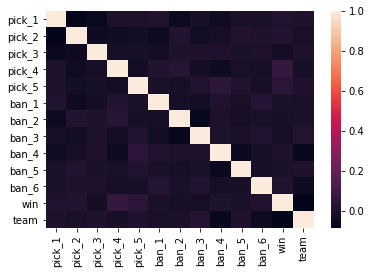

In [155]:
import seaborn as sns
#first heat map of correlations of everything (all data), picks, bans, win, team. 
sns.heatmap(patchAll_pbt.astype(int).corr())

From this heat map of single teams picks and bans it seems that no variable seems to have a huge influence on winning. This would seem to indicate a lot of parody in the DotA professional circuit. 

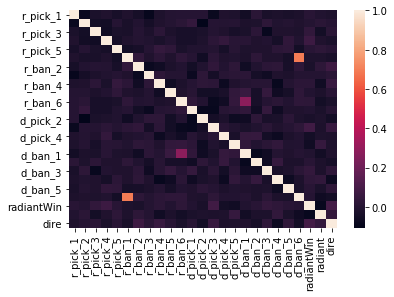

In [156]:
#Both teams per match picks and bans
sns.heatmap(patchAll_combined.astype(int).corr())

From this heat map now considering both teams picks and bans, we don't see anything concrete but notice that alot of bans are correlated too eachother. We also notice a contrast in Radiant and Dire correlation to winning. The Dire team seems to be slightly more correlated to a radiant win than the radiant team itself. 
We also know looking at the DotA Rankings (https://liquipedia.net/dota2/Dota_Pro_Circuit/2017-18/Rankings) that there was in fact dominant and underperforming teams. So it is a little interesting to not see it come up on the heat maps.

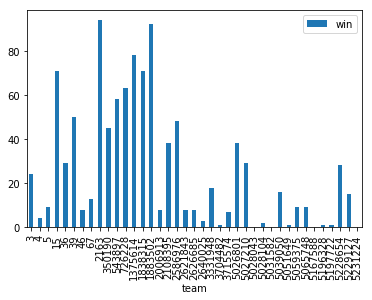

In [157]:
teams = patchAll_pbt[['win', 'team']]
team_win_df = pd.DataFrame(teams.groupby(['team']).sum())
team_win_df.plot.bar()

As we can see from the graph above and the table below, there are many teams that barely recorded any wins and only a handful of teams that won frequently. This indicates that who the team is matters and should be included in our final model despite it not seeming relevant in the heat graphs. 

In [158]:
team_win_df

,win
team,
3,24
4,4
5,9
15,71
36,29
39,50
46,8
67,13
2163,94


We see on a big scale that our heatmaps did not tell us much, but what happens when we break it down by patch? 

#### Patch 707

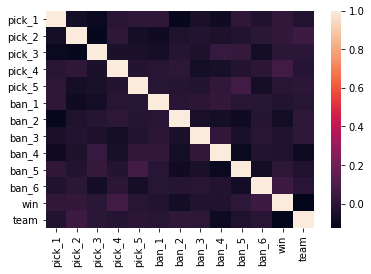

In [159]:

#Correlation heat charts. 
#For each patch, all data of picks, bans, win, team for single and combined. 

sns.heatmap(patch707_pbt.astype(int).corr())

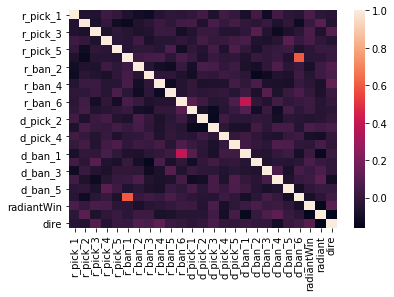

In [160]:
sns.heatmap(patch707_combined.astype(int).corr())

The trend in correlation all seem to reflect the overall data set trends. 

#### Patch 710

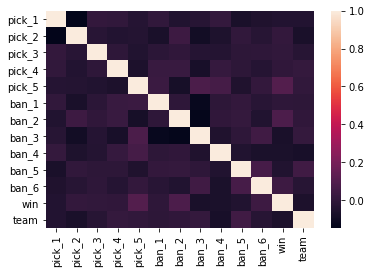

In [161]:
#single team bans, picks, win, team
sns.heatmap(patch710_pbt.astype(int).corr())

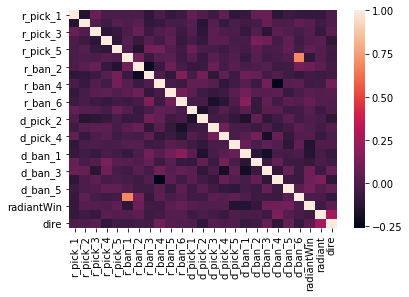

In [162]:
#combined teams (both teams in match) bans picks wins team
sns.heatmap(patch710_combined.astype(int).corr())

The heat map for Patch 710 when using both teams data is noticably brighter, indicating more positive correlation across the variables. Most importantly the radiant win seems to be effected by which team plays dire. 

#### Patch 714

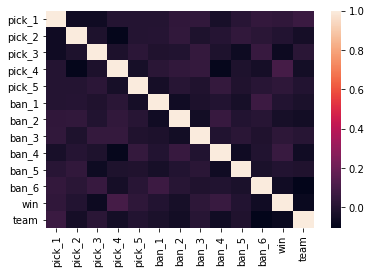

In [163]:
#single team bans, picks, win, team
sns.heatmap(patch714_pbt.astype(int).corr())

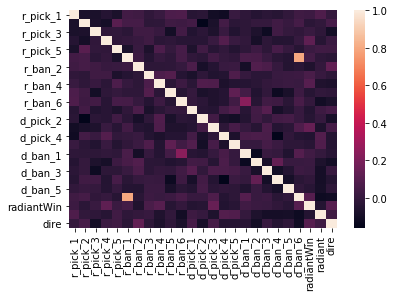

In [164]:
#combined teams (both teams in match) bans picks wins team
sns.heatmap(patch714_combined.astype(int).corr())

These heatmaps are unfortunately just as dark as the overall heat maps and cannot really help us mold this model. One thing we can note across the board is that using both teams combined data seems to have more positive correlation across the board. This makes sense as player's often pick based off what other teams' picks/ bans are. 